# Introduction, Description
This notebook is dedicated to the development of a pipeline that perform a quality assessment of an eeg signal.
The different metrics will be calculated:
- Average Root Mean Square (RMS) of a sliding window
- Maximum Gradient of a sliding window
- Zero Crossing Rate of a sliding window
- Complexity of the signal (Hjorth's parameters) of a sliding window
- Kurtosis of a sliding window
- Skewness of a sliding window
- Variance of a sliding window
- Range of a sliding window
- Interquartile range of a sliding window
- Signal to Noise Ratio (SNR)
    - Time domain: 
        - ECG based epochs (signal = average across epochs, noise = std across epochs) need to be lowered
        - TR based epochs (signal = average across epochs, noise = std across epochs) need to be lowered
        - EEG based epochs (signal = average across epochs, noise = std across epochs) need to be increased
    - Frequency domain:
        - Gradient artifacts (signal = peak frequency of the cross-correlation of the non-cleaned signal, noise = average of the n surrounding bins around the peak)
        - Base frequency of the task (signal = amplitude at the base freqeuency, noise = average of the n surrounding bins around the peak)

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from EEG_quality_assessment import frequency_spectrums as spectrums_package
raw = mne.io.read_raw_edf(
    '/Users/samuel/01_projects/EEG_quality_assessment/sub-01_ses-01_task-rest_run-01_eeg.edf', 
    
    preload=True)
spectrum_object = spectrums_package.Spectrum()
fft = spectrum_object.calculate_fft(raw)
amplitude = spectrum_object.copy().calculate_amplitude()
amplitude._set_frequency_of_interest(12)
zscore = amplitude.copy().calculate_zscore()
snr = amplitude.copy().calculate_snr()

Extracting EDF parameters from /Users/samuel/01_projects/EEG_quality_assessment/sub-01_ses-01_task-rest_run-01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155499  =      0.000 ...   621.996 secs...


/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_52980/2777648229.py:5: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(


Exception: Encountered invalid byte in at least one annotations channel. You might want to try setting "encoding='latin1'".

In [3]:
l = ['fft','a','b']
'a' in l

True

In [9]:
%matplotlib qt
#plt.plot(fft.frequencies, amplitude.spectrum[0,:].T)
plt.plot(fft.frequencies, snr.spectrum[0,:].T)

In [6]:
amplitude.calculate_amplitude()

TypeError: FourierSpectrum.copy() missing 1 required positional argument: 'self'

In [2]:
str(half_spectrum.dtype)

NameError: name 'half_spectrum' is not defined

In [1]:
from EEG_quality_assessment import frequency_spectrums as spectrums_package

In [7]:
t = __import__('frequency_spectrums')

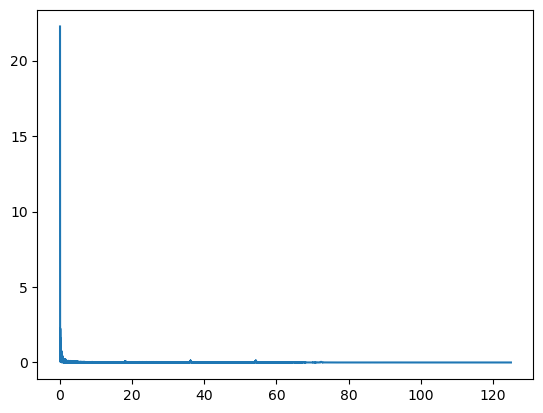

In [34]:
import matplotlib.pyplot as plt
plt.plot(frequencies,np.abs(half_spectrum[0,:]))

In [1]:
a = 'string'
type(a) == str

True